In [103]:
%matplotlib widget
from bmcs_cross_section.api import MKappa, EC2, ACI440
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Deriving the two-lines equations

Using a linear regression on data based on the parabolic EC2 stress-strain law of concrete

In [104]:
# EC2, eq. (3.14)

sig_c1, sig_c2, sig_c3, eps_cu1, b, d, A_f, f_fu, E_f, rho_f, f_f = \
 sp.symbols('sigma_c1 sigma_c2 sigma_c3, varepsilon_cu1, b, d, A_f, f_{fu}, E_f, rho_f, f_f', real=True, nonnegative=True)
eps_cy, eps_cu, eps, E_cc, f_cm = \
sp.symbols('varepsilon_cy, varepsilon_cu, varepsilon, E_cc, f_cm', real=True, nonnegative=True)

k = 1.05 * E_cc * eps_cy / f_cm
eta = eps / eps_cy
sig_c = f_cm * (k * eta - eta**2)/(1 + eta*(k-2))

sig_c_eps_ = sp.Piecewise(
        (0, eps > eps_cu),
        (sig_c, eps > 0),
        (0, True)
)

In [105]:
# # Comparison to EC2, multi-linear concept

# result2 = np.zeros((len(f_cms), 3))

# for i, f_cm_ in enumerate(f_cms):
#     sig_c_eps = sig_c_eps_.subs({E_cc:EC2.get_E_cm(f_cm_ - 8), eps_cy:eps_cy_, 
#                                 f_cm:EC2.get_f_cm(f_cm_ - 8), eps_cu:EC2.get_eps_cu1(f_cm_- 8)})
#     get_sig = sp.lambdify(eps, sig_c_eps, 'numpy')
#     eps_exact = np.linspace(0, eps_cy_, 300)
#     sig_exact = get_sig(eps_exact)
#     area_fine = np.trapz(y=sig_exact, x=eps_exact)
    
#     f_ck = f_cm_ - 8
#     eps_c3 = EC2.get_eps_c3(f_ck)
#     eps_cu3 = EC2.get_eps_cu3(f_ck)
#     area = eps_c3 * f_cm_ / 2 + (eps_cu3 - eps_c3) * f_cm_
    
#     result2[i, 0] = f_cm_
#     result2[i, 1] = area_fine
#     result2[i, 2] = area
# result2

In [117]:
# f_cms = np.array([ 20.,  24.,  28.,  33.,  38.,  43.,  48.,  53.,  58.,  63.,  68., 78.,  88.,  98., 108.])
f_cms = np.linspace(20, 108, 108 -20 +1)
result = np.zeros((len(f_cms), 3))

f_cm_limit = 98

for i, f_cm_ in enumerate(f_cms):
    eps_cy_ = EC2.get_eps_c1(f_cm_ - 8)
    eps_cu_ = EC2.get_eps_cu1(f_cm_- 8)

    sig_c_eps = sig_c_eps_.subs({E_cc:EC2.get_E_cm(f_cm_ - 8), eps_cy:eps_cy_, 
                                f_cm:EC2.get_f_cm(f_cm_ - 8), eps_cu:eps_cu_})
    get_sig = sp.lambdify(eps, sig_c_eps, 'numpy')
    
    eps_exact_part_1 = np.linspace(0, eps_cy_, 300)
    sig_exact_part_1 = get_sig(eps_exact_part_1)
    area_exact_part_1 = np.trapz(y=sig_exact_part_1, x=eps_exact_part_1)
    
    eps_exact_part_2 = np.linspace(eps_cy_, eps_cu_, 300)
    sig_exact_part_2 = get_sig(eps_exact_part_2)
    area_exact_part_2 = np.trapz(y=sig_exact_part_2, x=eps_exact_part_2)
    
    print('area_exact_part_2=', area_exact_part_2)

    sig_eps_c1_new = 2 * area_exact_part_1 / eps_cy_
    sig_eps_c1_scale = sig_eps_c1_new / f_cm_
    
    sig_eps_cu1_new = 2 * area_exact_part_2 / (eps_cu_ - eps_cy_) - sig_eps_c1_new
    sig_eps_cu1_scale = sig_eps_c1_scale if f_cm_ >= f_cm_limit else sig_eps_cu1_new / f_cm_
    
    result[i] = [f_cm_, sig_eps_c1_scale, sig_eps_cu1_scale]

result

area_exact_part_2= 0.02877701214730907
area_exact_part_2= 0.029815737674886583
area_exact_part_2= 0.030828691661410515
area_exact_part_2= 0.03181655570378753
area_exact_part_2= 0.03277995980757356
area_exact_part_2= 0.03371948824877098
area_exact_part_2= 0.034635684556817724
area_exact_part_2= 0.03552905577979381
area_exact_part_2= 0.03640007615840574
area_exact_part_2= 0.03724919030920934
area_exact_part_2= 0.03807681599757036
area_exact_part_2= 0.038883346565345735
area_exact_part_2= 0.039669153066218
area_exact_part_2= 0.04043458615206537
area_exact_part_2= 0.041179977746182116
area_exact_part_2= 0.04190564253309988
area_exact_part_2= 0.04261187928987349
area_exact_part_2= 0.04329897207970764
area_exact_part_2= 0.04396719132556892
area_exact_part_2= 0.04461679477875618
area_exact_part_2= 0.045248028395184936
area_exact_part_2= 0.0458611271303266
area_exact_part_2= 0.04645631566219391
area_exact_part_2= 0.04703380905049359
area_exact_part_2= 0.0475938133389697
area_exact_part_2= 0.04

C:\Users\hspartali\AppData\Local\Temp\ipykernel_10552\3539078300.py:28: RuntimeWarning: invalid value encountered in double_scalars
  sig_eps_cu1_new = 2 * area_exact_part_2 / (eps_cu_ - eps_cy_) - sig_eps_c1_new


array([[ 20.        ,   1.40553767,   0.25961634],
       [ 21.        ,   1.39991292,   0.26927106],
       [ 22.        ,   1.39449986,   0.27864123],
       [ 23.        ,   1.38928082,   0.2877492 ],
       [ 24.        ,   1.38424032,   0.2966147 ],
       [ 25.        ,   1.37936465,   0.30525524],
       [ 26.        ,   1.37464167,   0.31368645],
       [ 27.        ,   1.37006055,   0.32192231],
       [ 28.        ,   1.36561157,   0.32997541],
       [ 29.        ,   1.36128601,   0.33785714],
       [ 30.        ,   1.35707598,   0.34557778],
       [ 31.        ,   1.35297435,   0.35314673],
       [ 32.        ,   1.34897462,   0.36057252],
       [ 33.        ,   1.34507086,   0.36786299],
       [ 34.        ,   1.34125767,   0.37502531],
       [ 35.        ,   1.33753008,   0.38206607],
       [ 36.        ,   1.33388352,   0.38899138],
       [ 37.        ,   1.33031378,   0.39580684],
       [ 38.        ,   1.32681699,   0.40251767],
       [ 39.        ,   1.32338

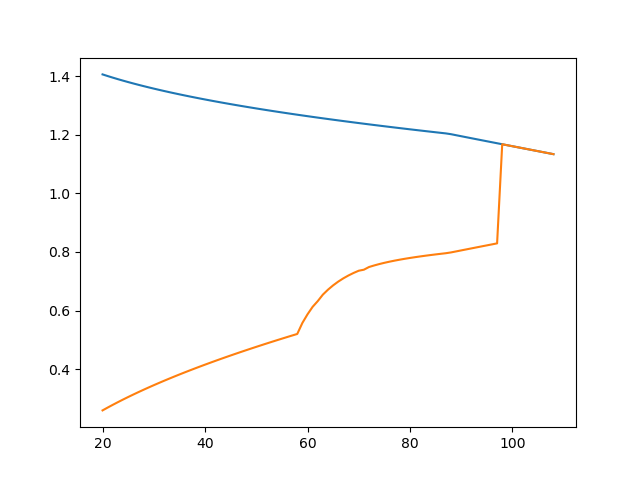

In [118]:
fig1, ax1 = plt.subplots()
ax1.plot(result[:, 0], result[:, 1])
ax1.plot(result[:, 0], result[:, 2])

In [119]:
# Linear regression using numpy

m1, p1 = np.polyfit(result[:, 0], result[:, 1], 1)
sig_cy_scale = m1 * f_cm + p1

# Exclude f_cm >= f_cm_limit from curve fitting
f_cms_less_than_limit = result[:, 0][result[:, 0] < f_cm_limit]
sig_eps_cu1_scale_for_f_cms_less_than_limit = result[:, 2][result[:, 0] < f_cm_limit]
m2, p2 = np.polyfit(f_cms_less_than_limit, sig_eps_cu1_scale_for_f_cms_less_than_limit, 1)
sig_cu_scale = m2 * f_cm + p2

sig_cy_scale, sig_cu_scale

(1.43762037986179 - 0.00278582241716739*f_cm,
 0.00822753426311964*f_cm + 0.0955313938528231)

In [120]:
get_sig_cy_scale = sp.lambdify(f_cm, sig_cy_scale, 'numpy')
get_sig_cu_scale = sp.lambdify(f_cm, sig_cu_scale, 'numpy')

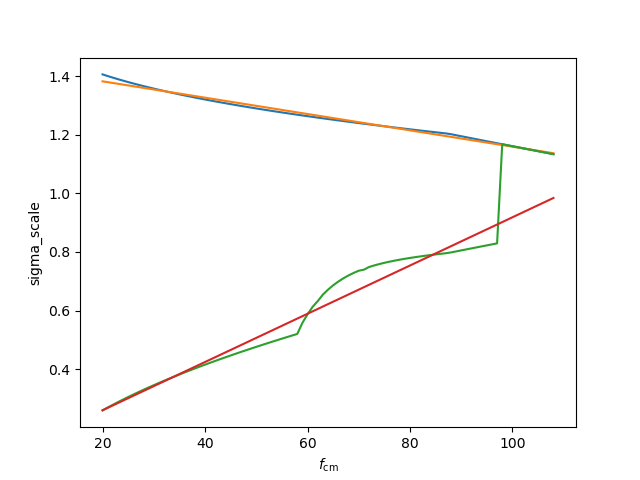

In [121]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('$f_\mathrm{cm}$')
ax1.set_ylabel('sigma_scale')

ax1.plot(result[:, 0], result[:, 1])
ax1.plot(result[:, 0], get_sig_cy_scale(result[:, 0]))

ax1.plot(result[:, 0], result[:, 2])
ax1.plot(result[:, 0], get_sig_cu_scale(result[:, 0]))

area_approx = 0.14279697384496404
area_exact = 0.1427964249293711
area_diff [%] = -0.0003844042966729845


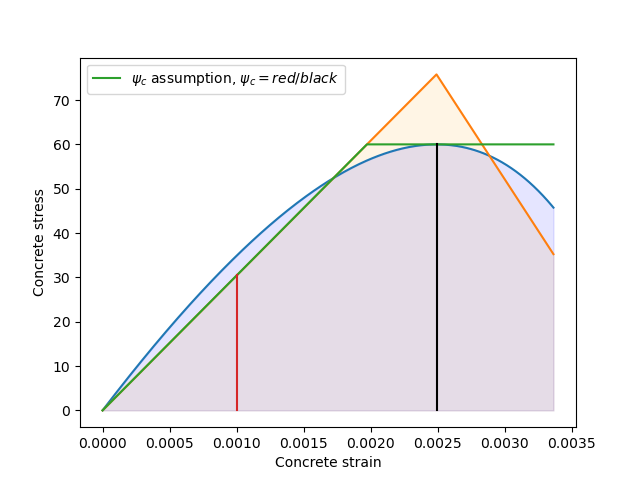

In [194]:
# Just for checking..

fig, ax = plt.subplots()

for f_cm_ in [60]: # f_cms:
    eps_cy_ = EC2.get_eps_c1(f_cm_ - 8)
    eps_cu_ = EC2.get_eps_cu1(f_cm_ - 8)
    sig_c_eps = sig_c_eps_.subs({E_cc:EC2.get_E_cm(f_cm_ - 8), eps_cy:eps_cy_, 
                                f_cm:f_cm_, eps_cu:eps_cu_})
    get_sig = sp.lambdify(eps, sig_c_eps, 'numpy')
    
    eps_exact = np.linspace(0, eps_cu_, 300)
    sig_exact = get_sig(eps_exact)
    
    f_cm_cy_scale = result[np.argwhere(result[:, 0] == f_cm_)[0]][0][1]
    f_cm_cu_scale = result[np.argwhere(result[:, 0] == f_cm_)[0]][0][2]
    eps_coarse = np.array([0., eps_cy_, eps_cu_])
    sig_coarse = np.array([0., f_cm_ * f_cm_cy_scale, f_cm_ * f_cm_cu_scale])
    
    area_approx = np.trapz(y=sig_coarse, x=eps_coarse)
    area_exact = np.trapz(y=sig_exact, x=eps_exact)
    print('area_approx =', area_approx)
    print('area_exact =', area_exact)
    print('area_diff [%] =', (area_exact - area_approx) * 100 / area_exact)
    
    ax.fill_between(eps_coarse, sig_coarse, color= 'orange', alpha= 0.1)
    ax.fill_between(eps_exact, sig_exact, color= 'blue', alpha= 0.1)
    ax.set_xlabel('Concrete strain')
    ax.set_ylabel('Concrete stress')
    ax.plot(eps_exact, sig_exact)
    ax.plot(eps_coarse, sig_coarse)
    
    # Plot example lines
    eps_sig_coarse_equals_f_cm = np.interp(f_cm_, sig_coarse[:-1], eps_coarse[:-1])
    eps_coarse_psi = np.array([0, eps_sig_coarse_equals_f_cm, eps_cu_])
    sig_coarse_psi = np.array([0, f_cm_, f_cm_])
    eps_example = 0.001
    sig_example = np.interp(eps_example, eps_coarse, sig_coarse)
    
    ax.plot(eps_coarse_psi, sig_coarse_psi, label='$\psi_c$ assumption, $\psi_c = red/black$')
    ax.plot([eps_example, eps_example], [0, sig_example])
    ax.plot([eps_cy_, eps_cy_], [0, f_cm_], c='black')
    ax.legend()

# fig.show()

# Deriving $M_u, \rho_\mathrm{fb}, \psi_c, \psi_f$ equations for the 2-lines-based material law

In [419]:
substitute_eps_cy = False
substitute_scaled_stress = False

if substitute_eps_cy:
    eps_cy = 0.001 * sp.Min(0.7 * f_cm ** 0.31, 2.8) # 0.001 * 0.7 * f_cm ** 0.31
    eps_cu = 0.001 * sp.Piecewise(
        (3.5, f_cm <= 58), 
        (2.8 + 27 * ((98 - f_cm) / 100) ** 4, True)
)
    
# Don't substitute scaled_stress as it makes formulas longer and not any better!
if substitute_scaled_stress:
    sig_cy_scaled = f_cm * sig_cy_scale
    sig_cu_scaled = f_cm * sig_cu_scale
else:
    sig_cy_scaled, sig_cu_scaled = sp.symbols(r'f_{cm_{cy}}, f_{cm_{cu}}')

sig_line = sp.Line(sp.Point(0, 0), sp.Point(eps_cy, sig_cy_scaled))
sig_line2 = sp.Line(sp.Point(eps_cy, sig_cy_scaled), sp.Point(eps_cu, sig_cu_scaled))

sig_eq_1 = sig_line.equation(x=eps, y=sig_c1)
sig_eq1 = sp.solve(sig_eq_1, sig_c1)[0]

sig_eq_2 = sig_line2.equation(x=eps, y=sig_c2)
sig_eq2 = sp.solve(sig_eq_2, sig_c2)[0]

In [420]:
sig_eq = sp.Piecewise(
        (sig_eq1, eps <= eps_cy), 
        (sig_eq2, True)
)
sig_eq

Piecewise((f_{cm_{cy}}*varepsilon/varepsilon_cy, varepsilon <= varepsilon_cy), ((f_{cm_{cu}}*varepsilon - f_{cm_{cu}}*varepsilon_cy - f_{cm_{cy}}*varepsilon + f_{cm_{cy}}*varepsilon_cu)/(varepsilon_cu - varepsilon_cy), True))

In [421]:
sig_eq_area = sp.integrate(sp.simplify(sig_eq), eps)
sig_eq_area

Piecewise((f_{cm_{cy}}*varepsilon**2/(2*varepsilon_cy), varepsilon <= varepsilon_cy), (f_{cm_{cy}}*varepsilon_cy/2 + varepsilon**2*(f_{cm_{cu}} - f_{cm_{cy}})/(2*varepsilon_cu - 2*varepsilon_cy) + varepsilon*(-f_{cm_{cu}}*varepsilon_cy + f_{cm_{cy}}*varepsilon_cu)/(varepsilon_cu - varepsilon_cy) - varepsilon_cy**2*(f_{cm_{cu}} - f_{cm_{cy}})/(2*varepsilon_cu - 2*varepsilon_cy) - varepsilon_cy*(-f_{cm_{cu}}*varepsilon_cy + f_{cm_{cy}}*varepsilon_cu)/(varepsilon_cu - varepsilon_cy), True))

In [422]:
area_up_to_eps_part_1 = sig_eq_area.args[0][0]
area_up_to_eps_part_2 = sig_eq_area.args[1][0]

## Calculate $F_\mathrm{c, cy}$ and $\rho_\mathrm{f, cy}$ defining the switch from part 1 to 2

In [339]:
# Compare F_t = A_f * f_fu with F_c_cy, if F_t <= F_c_1, then use psi_c formula, otherwise psi_c = 1
# Note: one can also compare eps_top_solved with eps_cy, but the equation of eps_top_solved is more complicated
eps_fu = f_fu/E_f
c_1 = d * (eps_cy / (eps_cy + eps_fu))
F_c_cy = area_up_to_eps_part_1.subs({eps:eps_cy}) * (c_1 / eps_cy) * b
F_c_cy = sp.simplify(F_c_cy)
F_c_cy

E_f*b*d*f_{cm_{cy}}*varepsilon_cy/(2*(E_f*varepsilon_cy + f_{fu}))

In [340]:
# rho corresponding to concrete block up to eps_cy
F_t_cy = A_f * f_fu
A_f_cy = sp.solve(F_c_cy - F_t_cy, A_f)[0]
rho_f_cy = A_f_cy /(b*d)
rho_f_cy

E_f*f_{cm_{cy}}*varepsilon_cy/(2*f_{fu}*(E_f*varepsilon_cy + f_{fu}))

In [392]:
sp.print_latex(rho_f_cy)

\frac{E_{f} f_{cm_{cy}} \varepsilon_{cy}}{2 f_{fu} \left(E_{f} \varepsilon_{cy} + f_{fu}\right)}


### Final $\rho_\mathrm{f, cy}$ formula

$\rho_\mathrm{f, cy} = \frac{E_{f} f_{cm_{cy}} \varepsilon_{cy}}{2 f_{fu} \left(E_{f} \varepsilon_{cy} + f_{fu}\right)}$

## $\psi_c$ for part 1

In [346]:
# Solving eps top for part 1
def get_eps_top_solved(index):
    c = d * eps/(eps + eps_fu)
    F_t = A_f * f_fu
    area_up_to_eps = area_up_to_eps_part_1 if index == 0 else area_up_to_eps_part_2
    sig_z_area = area_up_to_eps * (c / eps)
    F_c = sig_z_area * b
    eps_top_solved = sp.solve(F_t - F_c, eps)[1] # Note: this the positive solution
    eps_top_solved = sp.simplify(eps_top_solved)
    return eps_top_solved

eps_part_1 = get_eps_top_solved(0)
eps_part_1

f_{fu}*(sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(A_f*E_f*varepsilon_cy + 2*b*d*f_{cm_{cy}}) + A_f*sqrt(E_f)*varepsilon_cy)/(sqrt(E_f)*b*d*f_{cm_{cy}})

In [347]:
# Solving eps top for part 1
def get_psi(index):
    if index > 0:
        return 1
    else:
        eps_top_solved = get_eps_top_solved(0)
        sig_c_max = sig_eq1.subs({eps: eps_top_solved})
        psi_c = sp.Min(sig_c_max / f_cm, 1)
        psi_c = sp.simplify(psi_c)
        return psi_c
psi_c = get_psi(0)
psi_c

Min(1, sqrt(A_f)*f_{fu}*sqrt(A_f*E_f*varepsilon_cy + 2*b*d*f_{cm_{cy}})/(sqrt(E_f)*b*d*f_cm*sqrt(varepsilon_cy)) + A_f*f_{fu}/(b*d*f_cm))

### Validate with data

In [433]:
f_cms_vals = {sig_cy_scaled_:f_cm * sig_cy_scale, sig_cu_scaled_:f_cm * sig_cu_scale}
test_vals= {f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, 
            A_f:20,
            E_cc:EC2.get_E_cm(50-8), 
            eps_cy:EC2.get_eps_c1(50-8),
           eps_cu:EC2.get_eps_cu1(50-8)}

In [348]:
sp.N(psi_c.subs(f_cms_vals).subs(test_vals))

0.451738946449611

### Validate with Test T1

In [488]:
T1_data = {f_cm:98.63, b:300, d:90, f_fu:3823.90, E_f:247468.92, \
           rho_f:28.96/(300 * 90),
           A_f:28.96, E_cc:EC2.get_E_cm(98.63-8), eps_cy:EC2.get_eps_c1(98.63-8), \
           eps_cu:EC2.get_eps_cu1(98.63-8)}

# Value from MK tool is about 0.77
sp.N(psi_c.subs(f_cms_vals).subs(T1_data))

0.773330333072977

### Reduce and print formula

In [480]:
psi_c_reduced = sp.cse(psi_c)
psi_c_reduced[-1][0]

Min(1, sqrt(A_f)*x0*sqrt(A_f*E_f*varepsilon_cy + 2*b*d*f_{cm_{cy}})/(sqrt(E_f)*sqrt(varepsilon_cy)) + A_f*x0)

In [357]:
sp.print_latex(psi_c_reduced[-1][0])

\min\left(1, \frac{\sqrt{A_{f}} x_{0} \sqrt{A_{f} E_{f} \varepsilon_{cy} + 2 b d f_{cm_{cy}}}}{\sqrt{E_{f}} \sqrt{\varepsilon_{cy}}} + A_{f} x_{0}\right)


In [356]:
psi_c_reduced[0][0][1]

f_{fu}/(b*d*f_cm)

### Final $\psi_c$ formula

For $\rho_\mathrm{f} < \rho_\mathrm{fb}$, the utilization ratio for concrete is given as

$
\psi_c = \min\left(1,~\frac{f_\mathrm{fu}}{b d f_\mathrm{cm}} \cdot \bigg( A_\mathrm{f} + \sqrt{\frac{A_\mathrm{f} \cdot (A_\mathrm{f} E_\mathrm{f} \varepsilon_{cy} + 2 b d f_\mathrm{cm, cy})}{E_\mathrm{f} \varepsilon_\mathrm{cy}}} \bigg)\right)
$

Note: can be used for $\rho_\mathrm{f} < \rho_\mathrm{fb}$ without checking $F_t < F_{c, cy}$ because for that case it indeed result in a value larger than 1, so the final resulting value of 1 is correct.

## $M_u$ for part 1

In [270]:
# Because first part is triangle, the center of it is
# ce: the distance from the top of the cross section to the centroid of concrete compression block
c = d * eps/(eps + eps_fu)
ce1 = c.subs({eps: eps_part_1}) / 3
ce1 = sp.simplify(ce1)
ce1

E_f*d*(sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(A_f*E_f*varepsilon_cy + 2*b*d*f_{cm_{cy}}) + A_f*sqrt(E_f)*varepsilon_cy)/(3*(sqrt(E_f)*b*d*f_{cm_{cy}} + E_f*(sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(A_f*E_f*varepsilon_cy + 2*b*d*f_{cm_{cy}}) + A_f*sqrt(E_f)*varepsilon_cy)))

In [271]:
# Valid for f_cm > 80 in general and in case F_t < F_c_1
M_n_1 = sp.simplify(A_f * f_fu * (d - ce1))
M_n_1

A_f*d*f_{fu}*(3*sqrt(E_f)*b*d*f_{cm_{cy}} + 2*E_f*(sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(A_f*E_f*varepsilon_cy + 2*b*d*f_{cm_{cy}}) + A_f*sqrt(E_f)*varepsilon_cy))/(3*(sqrt(E_f)*b*d*f_{cm_{cy}} + E_f*(sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(A_f*E_f*varepsilon_cy + 2*b*d*f_{cm_{cy}}) + A_f*sqrt(E_f)*varepsilon_cy)))

### Reduce and print formula

In [272]:
# packaging common terms
M_n_1_reduced = sp.cse(M_n_1)
M_n_1_reduced

([(x0, sqrt(E_f)),
  (x1, b*d*f_{cm_{cy}}),
  (x2, x0*x1),
  (x3, A_f*varepsilon_cy),
  (x4, E_f*(sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(E_f*x3 + 2*x1) + x0*x3))],
 [A_f*d*f_{fu}*(3*x2 + 2*x4)/(3*(x2 + x4))])

In [376]:
M_n_1_reduced[-1][0]

A_f*d*f_{fu}*(3*x2 + 2*x4)/(3*(x2 + x4))

In [377]:
symb_exp_list = [[s, e] for (s, e) in M_n_1_reduced[0]]
for symb_exp in symb_exp_list:
    symb_exp[1] = symb_exp[1].subs({s:e for (s, e) in symb_exp_list})
symb_exp_list

[[x0, sqrt(E_f)],
 [x1, b*d*f_{cm_{cy}}],
 [x2, sqrt(E_f)*b*d*f_{cm_{cy}}],
 [x3, A_f*varepsilon_cy],
 [x4,
  E_f*(sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(A_f*E_f*varepsilon_cy + 2*b*d*f_{cm_{cy}}) + A_f*sqrt(E_f)*varepsilon_cy)]]

In [378]:
x2 = symb_exp_list[2][1]
x2

sqrt(E_f)*b*d*f_{cm_{cy}}

In [379]:
sp.print_latex(x2)

\sqrt{E_{f}} b d f_{cm_{cy}}


In [381]:
x4 = symb_exp_list[4][1]
x4

E_f*(sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(A_f*E_f*varepsilon_cy + 2*b*d*f_{cm_{cy}}) + A_f*sqrt(E_f)*varepsilon_cy)

In [389]:
sp.print_latex(x4)

E_{f} \left(\sqrt{A_{f}} \sqrt{\varepsilon_{cy}} \sqrt{A_{f} E_{f} \varepsilon_{cy} + 2 b d f_{cm_{cy}}} + A_{f} \sqrt{E_{f}} \varepsilon_{cy}\right)


In [286]:
sp.print_latex(M_n_1_reduced[-1][0])

\frac{A_{f} d f_{fu} \left(3 x_{2} + 2 x_{4}\right)}{3 \left(x_{2} + x_{4}\right)}


### Final $M_u$ formula

For $\rho_\mathrm{f} < \rho_\mathrm{f, cy}$, flexural capacity is given

$M_\mathrm{u,cy} = \frac{A_\mathrm{f} d f_\mathrm{fu} \left(3 m_{1} + 2 m_{2}\right)}{3 \left(m_{1} + m_{2}\right)}$

with

\begin{align}
m_1 & = \sqrt{E_\mathrm{f}} b d f_\mathrm{cm, cy}, \\
m_2 & =  E_f \Bigg( \sqrt{A_\mathrm{f} \varepsilon_\mathrm{cy} \cdot \bigg(A_\mathrm{f} E_\mathrm{f} \varepsilon_\mathrm{cy} + \frac{2 m_1}{\sqrt{E_\mathrm{f}}}\bigg)} + A_\mathrm{f}~\varepsilon_\mathrm{cy}~\sqrt{E_\mathrm{f}} \Bigg)
\end{align}

## Solving for the second part

Note: this is complex and not usable, but left here for completeness, use the formula of $\rho_f > \rho_{fb}$ instead which gives conservative M_u solution.

In [293]:
# eps_part_2 = get_eps_top_solved(1)
# eps_part_2

In [294]:
# ce_part_2 = ce2_eps_fraction.subs({eps: eps_part_2}) * c.subs({eps: eps_part_2})
# # simplify takes forever here
# # ce_part_2 = sp.simplify(ce_part_2)
# ce_part_2

In [295]:
# M_n_part_2 = A_f * f_fu * (d - ce_part_2)
# # simplify takes forever here
# # M_n_part_2 = sp.simplify(M_n_part_2)
# M_n_part_2

# Deriving $M_u$ and other equations for $\rho_\mathrm{f} \ge \rho_\mathrm{fb}$

Here, we know that $\varepsilon_{c, top} = \varepsilon_{cu}$

## Balanced reinforcement ratio $\rho_\mathrm{fb}$

In [416]:
F_t = A_f * f_fu
sig_z_area = area_up_to_eps_part_2.subs({eps:eps_cu}) * (c.subs({eps:eps_cu}) / eps_cu)
F_c = sig_z_area * b
A_fb = sp.solve(F_t - F_c, A_f)[0]
A_fb = sp.simplify(A_fb)
rho_fb = A_fb / (b * d)
rho_fb

E_f*(f_{cm_{cu}}*varepsilon_cu - f_{cm_{cu}}*varepsilon_cy + f_{cm_{cy}}*varepsilon_cu)/(2*f_{fu}*(E_f*varepsilon_cu + f_{fu}))

In [425]:
sp.N(rho_fb.subs(f_cms_vals).subs(test_vals))

0.00320321578123761

## $M_\mathrm{u}$ for $\rho_\mathrm{f} > \rho_\mathrm{fb}$

In [428]:
# Calculating centroid and area for second part:
# -----------------------------------------------
# The following is valid for any eps in the second descending line in the approximated sig-eps relation
# For f_cm > f_cm_limit, only the triangle is enough as the trapz doesn't exist because eps_cy = eps_cu
# However, even if these are used, setting eps_cy = eps_cu would cancel the trapezoidal part.
# Therefore, eps_cu1 formula in EC2 was adapted below.

triangle_area = eps_cy * sig_cy_scaled / 2
triangle_ce = (eps - eps_cy) + eps_cy / 3

small_base_trapz = sig_eq.args[1][0]
large_base_trapz = sig_cy_scaled
h_trapz = eps - eps_cy
trapz_ce_dist_from_large_base = (h_trapz/3) * (large_base_trapz + 2 * small_base_trapz) / (large_base_trapz + small_base_trapz)
trapz_ce_dist_from_large_base = sp.simplify(trapz_ce_dist_from_large_base)
trapz_ce = eps - eps_cy - trapz_ce_dist_from_large_base
trapz_ce = sp.simplify(trapz_ce)
trapz_area = h_trapz * (small_base_trapz + large_base_trapz) / 2 
trapz_area = sp.simplify(trapz_area)

total_area = triangle_area + trapz_area

ce2_eps = ((trapz_ce * trapz_area) + (triangle_ce * triangle_area)) / total_area
ce2_eps_fraction = ce2_eps / eps
ce2_eps_fraction = sp.simplify(ce2_eps_fraction)
ce2_eps_fraction

(f_{cm_{cy}}*varepsilon_cy*(3*varepsilon - 2*varepsilon_cy)*(varepsilon_cu - varepsilon_cy) + (varepsilon - varepsilon_cy)**2*(f_{cm_{cu}}*varepsilon - f_{cm_{cu}}*varepsilon_cy - f_{cm_{cy}}*varepsilon + f_{cm_{cy}}*varepsilon_cu + 2*f_{cm_{cy}}*(varepsilon_cu - varepsilon_cy)))/(3*varepsilon*(f_{cm_{cy}}*varepsilon_cy*(varepsilon_cu - varepsilon_cy) + (varepsilon - varepsilon_cy)*(f_{cm_{cu}}*varepsilon - f_{cm_{cu}}*varepsilon_cy - f_{cm_{cy}}*varepsilon + f_{cm_{cy}}*varepsilon_cu + f_{cm_{cy}}*(varepsilon_cu - varepsilon_cy))))

In [471]:
# ce: the distance from the top of the cross section to the centroid of concrete compression block
eps_fu = f_fu / E_f
c = d * eps/(eps + eps_fu)
ce2 = ce2_eps_fraction.subs({eps: eps_cu}) * c.subs({eps: eps_cu})
ce2 = sp.simplify(ce2)
ce2

E_f*d*(f_{cm_{cy}}*varepsilon_cy*(3*varepsilon_cu - 2*varepsilon_cy) + (varepsilon_cu - varepsilon_cy)*(f_{cm_{cu}}*varepsilon_cu - f_{cm_{cu}}*varepsilon_cy + 2*f_{cm_{cy}}*(varepsilon_cu - varepsilon_cy)))/(3*(E_f*varepsilon_cu + f_{fu})*(f_{cm_{cu}}*varepsilon_cu - f_{cm_{cu}}*varepsilon_cy + f_{cm_{cy}}*varepsilon_cy + f_{cm_{cy}}*(varepsilon_cu - varepsilon_cy)))

In [474]:
F_t = A_f * f_fu
sig_z_area = area_up_to_eps_part_2.subs({eps:eps_cu}) * (c.subs({eps:eps_cu}) / eps_cu)
F_c = sig_z_area * b
f_f_sol = sp.solve(F_t - F_c, f_fu)[1].subs({A_f:rho_f * b * d})
f_f_sol = sp.simplify(f_f_sol)

# Note: if f_f > f_fu then FRP reinforcement will fail on tension (most probably a rho_f < rho_fb is used)
f_f_ = sp.Min(f_f_sol, f_fu)
f_f_

Min(f_{fu}, sqrt(E_f)*sqrt(E_f*rho_f*varepsilon_cu**2 + 2*f_{cm_{cu}}*varepsilon_cu - 2*f_{cm_{cu}}*varepsilon_cy + 2*f_{cm_{cy}}*varepsilon_cu)/(2*sqrt(rho_f)) - E_f*varepsilon_cu/2)

In [475]:
psi_f = f_f / f_fu
psi_f

f_f/f_{fu}

In [476]:
test_vals= {f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, 
            A_f:250, 
            rho_f:250/(180*400),
            E_cc:EC2.get_E_cm(50-8), 
            eps_cy:EC2.get_eps_c1(50-8),
           eps_cu:EC2.get_eps_cu1(50-8)}

In [477]:
sp.N(f_f_.subs(f_cms_vals).subs(test_vals))

2389.10736554292

In [478]:
ce2_f_f = ce2.subs({f_fu: f_f})
M_n_2 = A_f * f_f * (d - ce2_f_f)
M_n_2 = sp.simplify(M_n_2)
M_n_2

# for rho<rho_fb but F_t > F_c_cy, a conservative approx is to USE THIS TOO, but with replacing f_f with f_fu ;)
# even if f_f is used it will retrun f_fu as it's limited not to exceed it

-A_f*d*f_f*(E_f*(f_{cm_{cy}}*varepsilon_cy*(3*varepsilon_cu - 2*varepsilon_cy) + (varepsilon_cu - varepsilon_cy)*(f_{cm_{cu}}*varepsilon_cu - f_{cm_{cu}}*varepsilon_cy + 2*f_{cm_{cy}}*(varepsilon_cu - varepsilon_cy))) - 3*(E_f*varepsilon_cu + f_f)*(f_{cm_{cu}}*varepsilon_cu - f_{cm_{cu}}*varepsilon_cy + f_{cm_{cy}}*varepsilon_cy + f_{cm_{cy}}*(varepsilon_cu - varepsilon_cy)))/(3*(E_f*varepsilon_cu + f_f)*(f_{cm_{cu}}*varepsilon_cu - f_{cm_{cu}}*varepsilon_cy + f_{cm_{cy}}*varepsilon_cy + f_{cm_{cy}}*(varepsilon_cu - varepsilon_cy)))

### Validation with Mk model


M_u_mk_model = 97.76 kNm

M_u_model = 97.65 kNm !!!

M_u_aci = 81.72 kNm !!!

In [484]:
sp.N(M_n_2.subs({f_f:f_f_}).subs(f_cms_vals).subs(test_vals) / 1e6)

97.6504404760672

In [485]:
ACI440.get_M_n(A_f=250, f_fu=2500, E_f=200000, f_c=50, b=400, d=180)

81.72727250760829

### Validation with T1 bending experiment

In [489]:
sp.N(M_n_2.subs({f_f:f_f_}).subs(f_cms_vals).subs(T1_data) / 1e6)

9.45696190033026

In [493]:
ACI440.get_M_n(A_f=T1_data[A_f], f_fu=T1_data[f_fu], E_f=T1_data[E_f], f_c=T1_data[f_cm], b=T1_data[b], d=T1_data[d])

9.439980300822834

In [494]:
sp.N(rho_fb.subs({f_f:f_f_}).subs(f_cms_vals).subs(T1_data))

0.00230061827749369

In [495]:
ACI440.get_rho_balanced(f_c=T1_data[f_cm], f_fu=T1_data[f_fu], E_f=T1_data[E_f])

0.0023169231194534973

C:\Users\hspartali\AppData\Local\Temp\ipykernel_10552\406985166.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


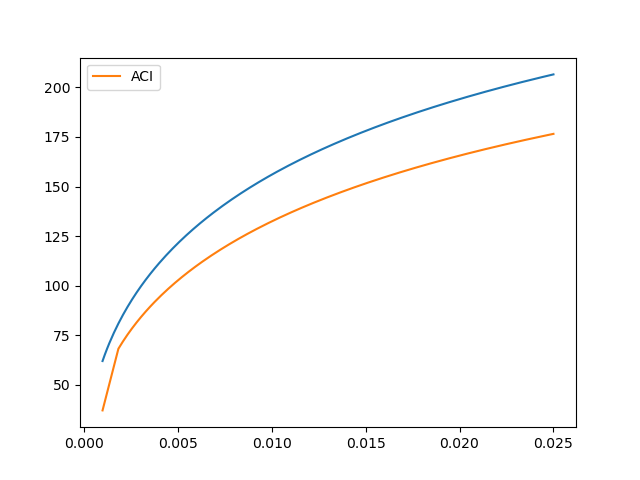

In [461]:
fig, ax = plt.subplots()
rho_list = np.linspace(0.1/100, 2.5/100, 200)
A_f_list = rho_list * 200 * 280
get_M_n = sp.lambdify(A_f, M_n_2.subs({f_f:f_f_sol, rho_f:A_f/(b*d)}).subs(f_cms_vals).subs({f_cm:48, b:200, d:280, f_fu:2500, E_f:158000, E_cc:EC2.get_E_cm(48-8), eps_cy:EC2.get_eps_c1(48-8), eps_cu:EC2.get_eps_cu1(48-8)}), 'numpy')

get_M_n_aci = np.zeros_like(rho_list)
for i, A_f_ in enumerate(A_f_list):
    get_M_n_aci[i] = ACI440.get_M_n(A_f=A_f_, f_fu=2500, E_f=158000, f_c=48, b=200, d=280)

ax.plot(rho_list, get_M_n(A_f_list)/1e6)
ax.plot(rho_list, get_M_n_aci, label='ACI')
ax.legend()

In [459]:
ACI440.get_rho_balanced(f_c=48, f_fu=2500, E_f=158000)

0.0018393513305793058

In [460]:
rho_fb.subs({f_f:f_f_sol, rho_f:A_f/(b*d)}).subs(f_cms_vals).subs({f_cm:48, b:200, d:280, f_fu:2500, E_f:158000, E_cc:EC2.get_E_cm(48-8), eps_cy:EC2.get_eps_c1(48-8), eps_cu:EC2.get_eps_cu1(48-8)})

0.00255381989675629

### Validation with experiments

**BC2HA** beam from Thériault1998_Effects of FRP Reinforcement Ratio and Concrete Strength on Flexural Behavior of Concrete Beams.pdf

M_u_experiment = 19.7 kNm

M_u_model = 19.7 kNm !!!

M_u_aci = 16 kNm !!!

In [469]:
sp.N(M_n_2.subs({f_f:f_f_}).subs(f_cms_vals).subs({f_cm:57.2, b:130, d:180-20-6-12.3/2, f_fu:773, E_f:38000,  rho_f:2*np.pi*(12.3/2)**2/(130*(180-20-6-12.3/2)), A_f:2*np.pi*(12.3/2)**2, E_cc:EC2.get_E_cm(57.2-8), eps_cy:EC2.get_eps_c1(57.2-8), eps_cu:EC2.get_eps_cu1(57.2-8)}) / 1e6)

19.7172786302442

In [470]:
ACI440.get_M_n(A_f=2*np.pi*(12.3/2)**2, f_fu=773, E_f=38000, f_c=57.2, b=130, d=180-20-6-12.3/2)

16.014750484294655

### Reduce and print formula

In [481]:
# packaging common terms
M_n_2_reduced = sp.cse(M_n_2)
M_n_2_reduced

([(x0, E_f*varepsilon_cu + f_f),
  (x1, f_{cm_{cy}}*varepsilon_cy),
  (x2, varepsilon_cu - varepsilon_cy),
  (x3, f_{cm_{cy}}*x2),
  (x4, f_{cm_{cu}}*varepsilon_cu - f_{cm_{cu}}*varepsilon_cy),
  (x5, x1 + x3 + x4)],
 [-A_f*d*f_f*(E_f*(x1*(3*varepsilon_cu - 2*varepsilon_cy) + x2*(2*x3 + x4)) - 3*x0*x5)/(3*x0*x5)])

In [482]:
M_n_2_reduced[-1][0]

-A_f*d*f_f*(E_f*(x1*(3*varepsilon_cu - 2*varepsilon_cy) + x2*(2*x3 + x4)) - 3*x0*x5)/(3*x0*x5)

In [483]:
symb_exp_list = [[s, e] for (s, e) in M_n_2_reduced[0]]
for symb_exp in symb_exp_list:
    symb_exp[1] = symb_exp[1].subs({s:e for (s, e) in symb_exp_list})
symb_exp_list

[[x0, E_f*varepsilon_cu + f_f],
 [x1, f_{cm_{cy}}*varepsilon_cy],
 [x2, varepsilon_cu - varepsilon_cy],
 [x3, f_{cm_{cy}}*(varepsilon_cu - varepsilon_cy)],
 [x4, f_{cm_{cu}}*varepsilon_cu - f_{cm_{cu}}*varepsilon_cy],
 [x5,
  f_{cm_{cu}}*varepsilon_cu - f_{cm_{cu}}*varepsilon_cy + f_{cm_{cy}}*varepsilon_cy + f_{cm_{cy}}*(varepsilon_cu - varepsilon_cy)]]

### Final $M_u$ formula

For $\rho_\mathrm{f} > \rho_\mathrm{f, cy}$, flexural capacity is given

$M_\mathrm{u,cu} = xxx$

with

<!-- \begin{align}
m_1 & = \sqrt{E_\mathrm{f}} b d f_\mathrm{cm, cy}, \\
m_2 & =  E_f \Bigg( \sqrt{A_\mathrm{f} \varepsilon_\mathrm{cy} \cdot \bigg(A_\mathrm{f} E_\mathrm{f} \varepsilon_\mathrm{cy} + \frac{2 m_1}{\sqrt{E_\mathrm{f}}}\bigg)} + A_\mathrm{f}~\varepsilon_\mathrm{cy}~\sqrt{E_\mathrm{f}} \Bigg)
\end{align} -->

Note: this formula is exact for $\rho_\mathrm{f} > \rho_\mathrm{fb}$ and for $\rho_\mathrm{f, cy} < \rho_\mathrm{f} < \rho_\mathrm{fb}$ it's a conservative approx. considering the whole concrete block which gives larger ce resulting in smaller M_u

# Summary

## Moment capacity

Calculate $\rho_\mathrm{f,cy}$ as:

$
\rho_\mathrm{f,cy} = \frac{E_\mathrm{f} f_\mathrm{cm} \varepsilon_\mathrm{cy} \left(1.438 \cdot 10^{17} - 2.786 \cdot 10^{14} f_\mathrm{cm}\right)}{2 \cdot 10^{17} f_\mathrm{fu} \left(E_\mathrm{f} \varepsilon_\mathrm{cy} + f_\mathrm{fu}\right)}
$

The ultimate flexural moment is given:

\begin{equation*}
  M_\mathrm{u}=
  \begin{cases}
      M_\mathrm{u,cy},
    & \rho_\mathrm{f} \le \rho_\mathrm{f,cy}\\
      M_\mathrm{u,cu},
    & \rho_\mathrm{f} > \rho_\mathrm{f,cy}.
  \end{cases}
\end{equation*}

where

$M_\mathrm{u,cy} = \frac{A_\mathrm{f} d f_\mathrm{fu} \left(3 m_{1} + 2 m_{2}\right)}{3 \left(m_{1} + m_{2}\right)}$

with

\begin{align}
m_1 & = \sqrt{E_\mathrm{f}} b d f_\mathrm{cm, cy}, \\
m_2 & =  E_f \Bigg( \sqrt{A_\mathrm{f} \varepsilon_\mathrm{cy} \cdot \bigg(A_\mathrm{f} E_\mathrm{f} \varepsilon_\mathrm{cy} + \frac{2 m_1}{\sqrt{E_\mathrm{f}}}\bigg)} + A_\mathrm{f}~\varepsilon_\mathrm{cy}~\sqrt{E_\mathrm{f}} \Bigg)
\end{align}

and

$\varepsilon_\mathrm{cy} = 0.001 \cdot \min\left(2.8,~0.7 f_{cm}^{0.31}\right)$
\begin{equation*}
  \varepsilon_\mathrm{cu}= 0.001 \cdot
  \begin{cases}
      3.5 ,
    & f_\mathrm{cm} \le 58~\mathrm{MPa} \\
    2.8 + 27 \cdot \big(\frac{98 - f_\mathrm{cm}}{100}\big)^4,
    & 58~\mathrm{MPa} < f_\mathrm{cm} \boldsymbol{\le 98~\mathrm{MPa}}\\
    \boldsymbol{2.8,}
    & \boldsymbol{f_\mathrm{cm} > 98~\mathrm{MPa}}.
  \end{cases}
\end{equation*}

The bold marked text is an adaptation to EC2 formula.

## Material utilization factors ($\psi_\mathrm{c}~and~\psi_\mathrm{f}$)

\begin{equation*}
  \psi_\mathrm{c} =
  \begin{cases}
\psi_c = \min\left(1,~\frac{f_\mathrm{fu}}{b d f_\mathrm{cm}} \cdot \bigg( A_\mathrm{f} + \sqrt{\frac{A_\mathrm{f} \cdot (A_\mathrm{f} E_\mathrm{f} \varepsilon_{cy} + 2 b d f_\mathrm{cm, cy})}{E_\mathrm{f} \varepsilon_\mathrm{cy}}} \bigg)\right)
,
    & \rho_\mathrm{f} < \rho_\mathrm{f,cy}\\
      1,
    & \rho_\mathrm{f} \ge \rho_\mathrm{f,cy}.
  \end{cases}
\end{equation*}

\begin{equation*}
  \psi_\mathrm{f} =
  \begin{cases}
      \frac{f_\mathrm{f}}{f_\mathrm{fu}},
    & \rho_\mathrm{f} > \rho_\mathrm{fb}\\
      1,
    & \rho_\mathrm{f} \le \rho_\mathrm{fb}.
  \end{cases}
\end{equation*}

In [207]:
psi_c_reduced[-1][0]

Min(1, sqrt(5)*sqrt(A_f)*x0*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 278582241716739*f_cm**2*x1 + 143762037986179000*f_cm*x1)/(500000000*sqrt(E_f)*sqrt(varepsilon_cy)) + A_f*x0)